In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src import SHRaman, plotBifDiags, animateBifDiag, params, read_state, write_state, read_summary, write_summary

In [4]:
%matplotlib qt
u = np.roll(read_state('bs2_large_', 'x0')[:-2], 100)
plt.plot(u)
plt.show()

In [5]:
def add_peaks(u, p0, pf):
    N = len(u)
    peak = u[p0:pf+1]
    new_u = np.append(u[:pf+1], peak)
    new_u = np.append(new_u, u[pf+1:])
    return new_u[:N]


In [6]:
i = 2
u2 = u

In [12]:
#u2 = np.roll(u2, -25)
plt.plot(u2)

In [11]:
u2 = add_peaks(u2, 59, 108)

i += 1

plt.plot(u2)
plt.title(f'BS{i}')
plt.show()


In [13]:
write_state(u2, f'pttrn_large_dns', f'p')

In [20]:
up_ = np.append(up[:118], u[64:118])
up_ = np.append(up_, up[118:450])
hss = np.zeros(512 - len(up_)) + u[350]
up_ = np.append(up_, hss)
plt.plot(up_)
plt.show()

In [18]:
up = up_

In [19]:
write_state(up, 'bs8_tmp', filename='bs8')

In [3]:
%matplotlib inline

Int64Index([4608, 7183], dtype='int64')
['-', '--', '-']
Int64Index([0, 1112], dtype='int64')
['-', '-', '--']
Int64Index([0, 1111], dtype='int64')
['-', '-', '--']
Int64Index([189270, 190246, 191085, 191854, 192657, 193440, 194235, 195025,
            195823, 196648, 197498, 198323, 199121, 199911, 200707, 201490,
            202293, 203062, 203904, 204875],
           dtype='int64')
['--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--']


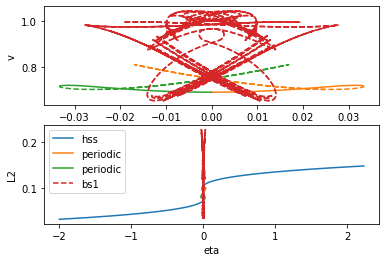

In [5]:
plotBifDiags('hss_gamma=0.24', 'periodic_gamma=0.24', 'periodic_back_gamma=0.24', 'bs1_gamma=0.14')

In [1]:
shr = SHRaman(branch='periodic_gamma=0.24', **params)

NameError: name 'SHRaman' is not defined

In [19]:
s = read_summary('pttrn_large_')
plt.plot(s['eta'], s['L2'])

In [20]:
top_s = s[s['L2']>0.135]
corner_s_idx = top_s['eta'].idxmin()
s_max = s.iloc[corner_s_idx]
plt.plot(s_max['eta'], s_max['L2'], 'o')
plt.show()

In [21]:
s = s.iloc[:corner_s_idx]
plt.plot(s['eta'], s['L2'])
plt.show()

In [22]:
k = 0
while True:
    df = s[s['branch'] == k]
    if len(df) == 0:
        break
    stab = df['stability'].iloc[0]
    line = '--' if stab == 'unstable' else '-'
    plt.plot(df['eta'], df['L2'], line)
    k += 1
plt.show()

In [24]:
import os
os.mkdir('data/pttrn_large_cropped')
s.to_csv('data/pttrn_large_cropped/s.csv')

In [65]:
######## Crop bright and dark solitons ########
df = read_summary('ds4_large___')
eta_0 = df['eta'].iloc[0]
l2_0 = df['L2'].iloc[0]

In [64]:
df['diff'] = (df['eta'] - eta_0)**2 + (df['L2'] - l2_0)**2
df.sort_values(by=['diff'], inplace=True)
print(df['diff'].head())

0       0.000000e+00
2638    1.300916e-10
2637    1.579399e-09
1       2.817424e-09
2639    3.939450e-09
Name: diff, dtype: float64


In [66]:
df_ = df.iloc[:2638]
plt.plot(df_['eta'], df_['L2'])
plt.show()

In [67]:
branch = 'data/ds4_large_cropped'
os.mkdir(branch)
df_.to_csv(branch + '/s.csv')